# Social Cops Task

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mticker

from statsmodels.tsa.stattools import acf
import warnings
warnings.filterwarnings('ignore')

### LOADING /CLEANING/EXPLORING THE GIVEN DATA 

In [131]:
cmo_msp = pd.read_csv("CMO_MSP_Mandi.csv")
monthly_cmo = pd.read_csv("Monthly_data_cmo.csv")
print ((monthly_cmo).head())

         APMC      Commodity  Year  Month  arrivals_in_qtl  min_price  \
0  Ahmednagar          Bajri  2015  April               79       1406   
1  Ahmednagar          Bajri  2016  April              106       1788   
2  Ahmednagar  Wheat(Husked)  2015  April             1253       1572   
3  Ahmednagar  Wheat(Husked)  2016  April              387       1750   
4  Ahmednagar  Sorgum(Jawar)  2015  April             3825       1600   

   max_price  modal_price     date district_name   state_name  
0       1538         1463  2015-04    Ahmadnagar  Maharashtra  
1       1925         1875  2016-04    Ahmadnagar  Maharashtra  
2       1890         1731  2015-04    Ahmadnagar  Maharashtra  
3       2220         1999  2016-04    Ahmadnagar  Maharashtra  
4       2200         1900  2015-04    Ahmadnagar  Maharashtra  


In [132]:
print (cmo_msp.head())

         commodity  year          Type  msprice  msp_filter
0   PADDY-UNHUSKED  2012  Kharif Crops   1250.0           1
1  RICE(PADDY-HUS)  2012  Kharif Crops   1280.0           1
2     Jowar_Hybrid  2012  Kharif Crops   1500.0           1
3    SORGUM(JAWAR)  2012  Kharif Crops   1520.0           1
4            BAJRI  2012  Kharif Crops   1175.0           1


In [133]:
#Dropping the column instead of mapping 
monthly_cmo = monthly_cmo.drop(['Year','Month','state_name'],axis = 1)

In [134]:
#Splitting for every Year /Month
monthly_cmo['Year'] = monthly_cmo['date'].str.split('-').str[0]
monthly_cmo['Month']= monthly_cmo['date'].str.split('-').str[1]
print(monthly_cmo.head())

         APMC      Commodity  arrivals_in_qtl  min_price  max_price  \
0  Ahmednagar          Bajri               79       1406       1538   
1  Ahmednagar          Bajri              106       1788       1925   
2  Ahmednagar  Wheat(Husked)             1253       1572       1890   
3  Ahmednagar  Wheat(Husked)              387       1750       2220   
4  Ahmednagar  Sorgum(Jawar)             3825       1600       2200   

   modal_price     date district_name  Year Month  
0         1463  2015-04    Ahmadnagar  2015    04  
1         1875  2016-04    Ahmadnagar  2016    04  
2         1731  2015-04    Ahmadnagar  2015    04  
3         1999  2016-04    Ahmadnagar  2016    04  
4         1900  2015-04    Ahmadnagar  2015    04  


In [135]:
#Lowercasing and Removing the spaces for Commodity Column 

In [136]:

monthly_cmo['Commodity'] = monthly_cmo['Commodity'].str.lower()
(monthly_cmo['Commodity'].head())

0            bajri
1            bajri
2    wheat(husked)
3    wheat(husked)
4    sorgum(jawar)
Name: Commodity, dtype: object

In [137]:
monthly_cmo['Commodity']= monthly_cmo['Commodity'].str.replace(" ","")
(monthly_cmo['Commodity'].head())


0            bajri
1            bajri
2    wheat(husked)
3    wheat(husked)
4    sorgum(jawar)
Name: Commodity, dtype: object

In [138]:
#Converting the datatype of Year and Month
monthly_cmo['Year']= (monthly_cmo['Year'].astype(int))
monthly_cmo['Month']= (monthly_cmo['Month'].astype(int))

#### DIVIDING THE DATASET ON THE BASIS OF YEARS FOR FINDING THE OUTLIERS 

In [139]:
#Dividing the data to detect outliers in each year 

data_2014 = monthly_cmo[monthly_cmo['Year']==2014]
data_2015 = monthly_cmo[monthly_cmo['Year']==2015]
data_2016 = monthly_cmo[monthly_cmo['Year']==2016]
print (data_2014.dtypes)

APMC               object
Commodity          object
arrivals_in_qtl     int64
min_price           int64
max_price           int64
modal_price         int64
date               object
district_name      object
Year                int32
Month               int32
dtype: object


In [140]:
len(data_2014['modal_price'])

7901

### USING BOXPLOTS JUST TO GET THE IDEA FOR OUTLIERS 

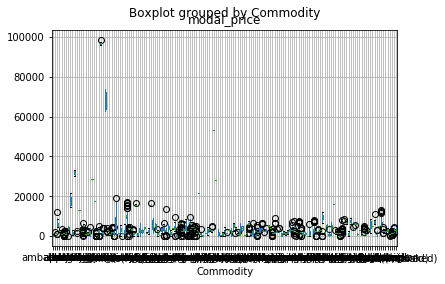

In [105]:
data_2014.boxplot(column='modal_price', by='Commodity')

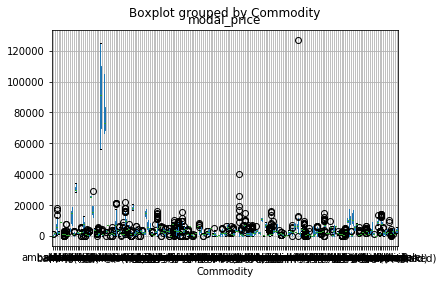

In [106]:
data_2015.boxplot(column='modal_price', by='Commodity')

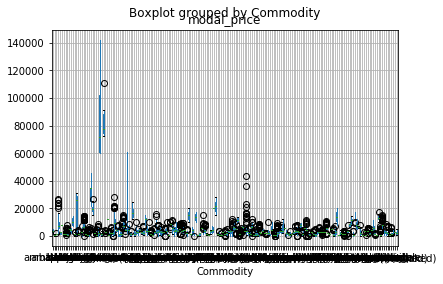

In [107]:
data_2016.boxplot(column='modal_price', by='Commodity')

### Writing a function to detect outliers on yearly basis

In [141]:
outliers =[]
def outlier_select(data):
    q1 = np.percentile(data.modal_price, 25) 
    q3 = np.percentile(data.modal_price, 75) 
    lower_bound = q1 - (1.5 * (q3-q1))
    upper_bound = q3 + (1.5 * (q3-q1))
    for i in range(0,len(data)):
        if (data.modal_price.iloc[i]>upper_bound or data.modal_price.iloc[i]<lower_bound):
            outliers.append(data.modal_price.iloc[i])
    return(len(outliers))

In [142]:
outlier_select(data_2014)

381

In [143]:
len(data_2014)

7901

In [144]:
data_2014 = data_2014[~data_2014['modal_price'].isin(outliers) ]
print (len(data_2014))

7520


In [145]:
outlier_select(data_2015)

1725

In [146]:
len(data_2015)

25557

In [147]:
data_2015 = data_2015[data_2015['modal_price'].isin(outliers)==False ]
print (len(data_2015))

23931


In [148]:
len(data_2016)

28971

In [149]:
outlier_select(data_2016)

2320

In [150]:
data_2016 = data_2016[data_2016['modal_price'].isin(outliers) == False ]
print (len(data_2016))

27376


#### Combing the data after filter the outliers from data 

In [151]:
total_data_new= pd.concat([data_2014,data_2015,data_2016])
print(len(total_data_new))

58827


In [152]:
total_data_new.to_csv("total_data_without_outlier.csv",encoding='utf-8', index=False)

## Determining The Seasonality 


In [153]:
#Converting data to timeseries

total_data_new.date = pd.to_datetime(total_data_new.date)
print (total_data_new.head())

      APMC       Commodity  arrivals_in_qtl  min_price  max_price  \
727  Akole           bajri               40       1375       1750   
729  Akole  paddy-unhusked              346       1400       1800   
731  Akole   wheat(husked)               55       1500       1900   
734  Akole     bhagar/vari               59       2000       2600   
735  Akole            gram                9       3200       3300   

     modal_price       date district_name  Year  Month  
727         1563 2014-12-01    Ahmadnagar  2014     12  
729         1625 2014-12-01    Ahmadnagar  2014     12  
731         1675 2014-12-01    Ahmadnagar  2014     12  
734         2400 2014-12-01    Ahmadnagar  2014     12  
735         3235 2014-12-01    Ahmadnagar  2014     12  


In [154]:
total_data_new = total_data_new.set_index("date")

In [155]:
total_data_new.index

DatetimeIndex(['2014-12-01', '2014-12-01', '2014-12-01', '2014-12-01',
               '2014-12-01', '2014-12-01', '2014-12-01', '2014-12-01',
               '2014-12-01', '2014-12-01',
               ...
               '2016-11-01', '2016-11-01', '2016-11-01', '2016-11-01',
               '2016-11-01', '2016-11-01', '2016-11-01', '2016-11-01',
               '2016-11-01', '2016-11-01'],
              dtype='datetime64[ns]', name='date', length=58827, freq=None)

### Finding the trend in data for each cluster of APMC,Commodity using moving average for each year 

In [156]:
total_data_new = total_data_new.sort_index()
total_data_new['trend'] = total_data_new.assign(Year=total_data_new.index.year).groupby(['APMC', 'Commodity','Year'],as_index = False)['modal_price'].transform(lambda x: x.expanding(1).mean())
print (total_data_new)

                               APMC        Commodity  arrivals_in_qtl  \
date                                                                    
2014-09-01                   Devala        horsegram                3   
2014-09-01               Chandrapur             gram               54   
2014-09-01                Brahmpuri   paddy-unhusked             2378   
2014-09-01                   Partur             gram               34   
2014-09-01                   Partur        greengram              537   
2014-09-01                   Partur   pigeonpea(tur)               49   
2014-09-01                    Aheri   paddy-unhusked               20   
2014-09-01                    Aheri    sorgum(jawar)               10   
2014-09-01                    Aheri  rice(paddy-hus)               20   
2014-09-01                    Aheri          batbati                6   
2014-09-01                    Aheri             gram                7   
2014-09-01                    Aheri   pigeonpea(tur

In [157]:
total_data_copy = total_data_new
total_data_copy['detrended_a']= total_data_copy['modal_price'] - total_data_copy['trend']
#total_data_copy['
total_data_copy['detrended_m'] = total_data_copy['modal_price']/total_data_copy['trend']
#total_data_copy['
total_data_copy['seasonal_a']  = total_data_copy.groupby(["APMC", "Commodity","Month"])['detrended_a'].transform(lambda x: x.mean())
total_data_copy['seasonal_m'] = total_data_copy.groupby(["APMC", "Commodity","Month"])['detrended_m'].transform(lambda x : x.mean())
total_data_copy['residual_a'] = total_data_copy['detrended_a'] -  total_data_copy['seasonal_a']
total_data_copy['residual_m'] = total_data_copy['detrended_m'] / total_data_copy['seasonal_m']
#print(total_data_new['seasonal_m'])
#print(residual_m)

In [158]:
print (total_data_copy.head())

                  APMC       Commodity  arrivals_in_qtl  min_price  max_price  \
date                                                                            
2014-09-01      Devala       horsegram                3       3035       3035   
2014-09-01  Chandrapur            gram               54       2283       2638   
2014-09-01   Brahmpuri  paddy-unhusked             2378       2660       2755   
2014-09-01      Partur            gram               34       2053       2438   
2014-09-01      Partur       greengram              537       4657       6133   

            modal_price district_name  Year  Month   trend  detrended_a  \
date                                                                      
2014-09-01         3035         Nasik  2014      9  3035.0          0.0   
2014-09-01         2521    Chandrapur  2014      9  2521.0          0.0   
2014-09-01         2708    Chandrapur  2014      9  2708.0          0.0   
2014-09-01         2328         Jalna  2014      9  2328.

In [159]:
acf_calc_a = sum(acf(total_data_copy['residual_a']**2))
acf_calc_m = sum(acf(total_data_copy['residual_m']**2))
if acf_calc_a< acf_calc_m :
    total_data_new['trend'] = total_data_copy['trend']
    total_data_new['detrend_a'] = total_data_copy['detrend_a'] 
    total_data_new['seasonal_a'] = total_data_copy['seasonality_a']
    total_data_new['residual_a'] = total_data_copy['residual_a']
    total_data_new['Seasonilty_Type'] = " Additive"
else :
    total_data_new['trend'] = total_data_copy['trend']
    total_data_new['detrended_m'] = total_data_copy['detrended_m']
    total_data_new['seasonal_m'] = total_data_copy['seasonal_m']
    total_data_new['residual_m'] = total_data_copy['residual_m']
    total_data_new['Seasonilty_Type'] = "Multiplicative"

In [160]:
total_data_new = total_data_new.drop(['detrended_a',"seasonal_a","residual_a"],axis = 1)

In [161]:
total_data_new.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,district_name,Year,Month,trend,detrended_m,seasonal_m,residual_m,Seasonilty_Type
date,,,,,,,,,,,,,,
2014-09-01,Devala,horsegram,3,3035,3035,3035,Nasik,2014,9,3035.0,1.0,1.089854,0.917554,Multiplicative
2014-09-01,Chandrapur,gram,54,2283,2638,2521,Chandrapur,2014,9,2521.0,1.0,1.000000,1.000000,Multiplicative
2014-09-01,Brahmpuri,paddy-unhusked,2378,2660,2755,2708,Chandrapur,2014,9,2708.0,1.0,1.064665,0.939262,Multiplicative
2014-09-01,Partur,gram,34,2053,2438,2328,Jalna,2014,9,2328.0,1.0,1.000000,1.000000,Multiplicative
2014-09-01,Partur,greengram,537,4657,6133,5370,Jalna,2014,9,5370.0,1.0,1.032676,0.968358,Multiplicative


In [162]:
total_data_new.to_csv("seasonality_type.csv",encoding='utf-8', index=False)

### An Example of Time Series Decomposition for APMC = Aurangabad, Commodity = capsicum for 2014-16

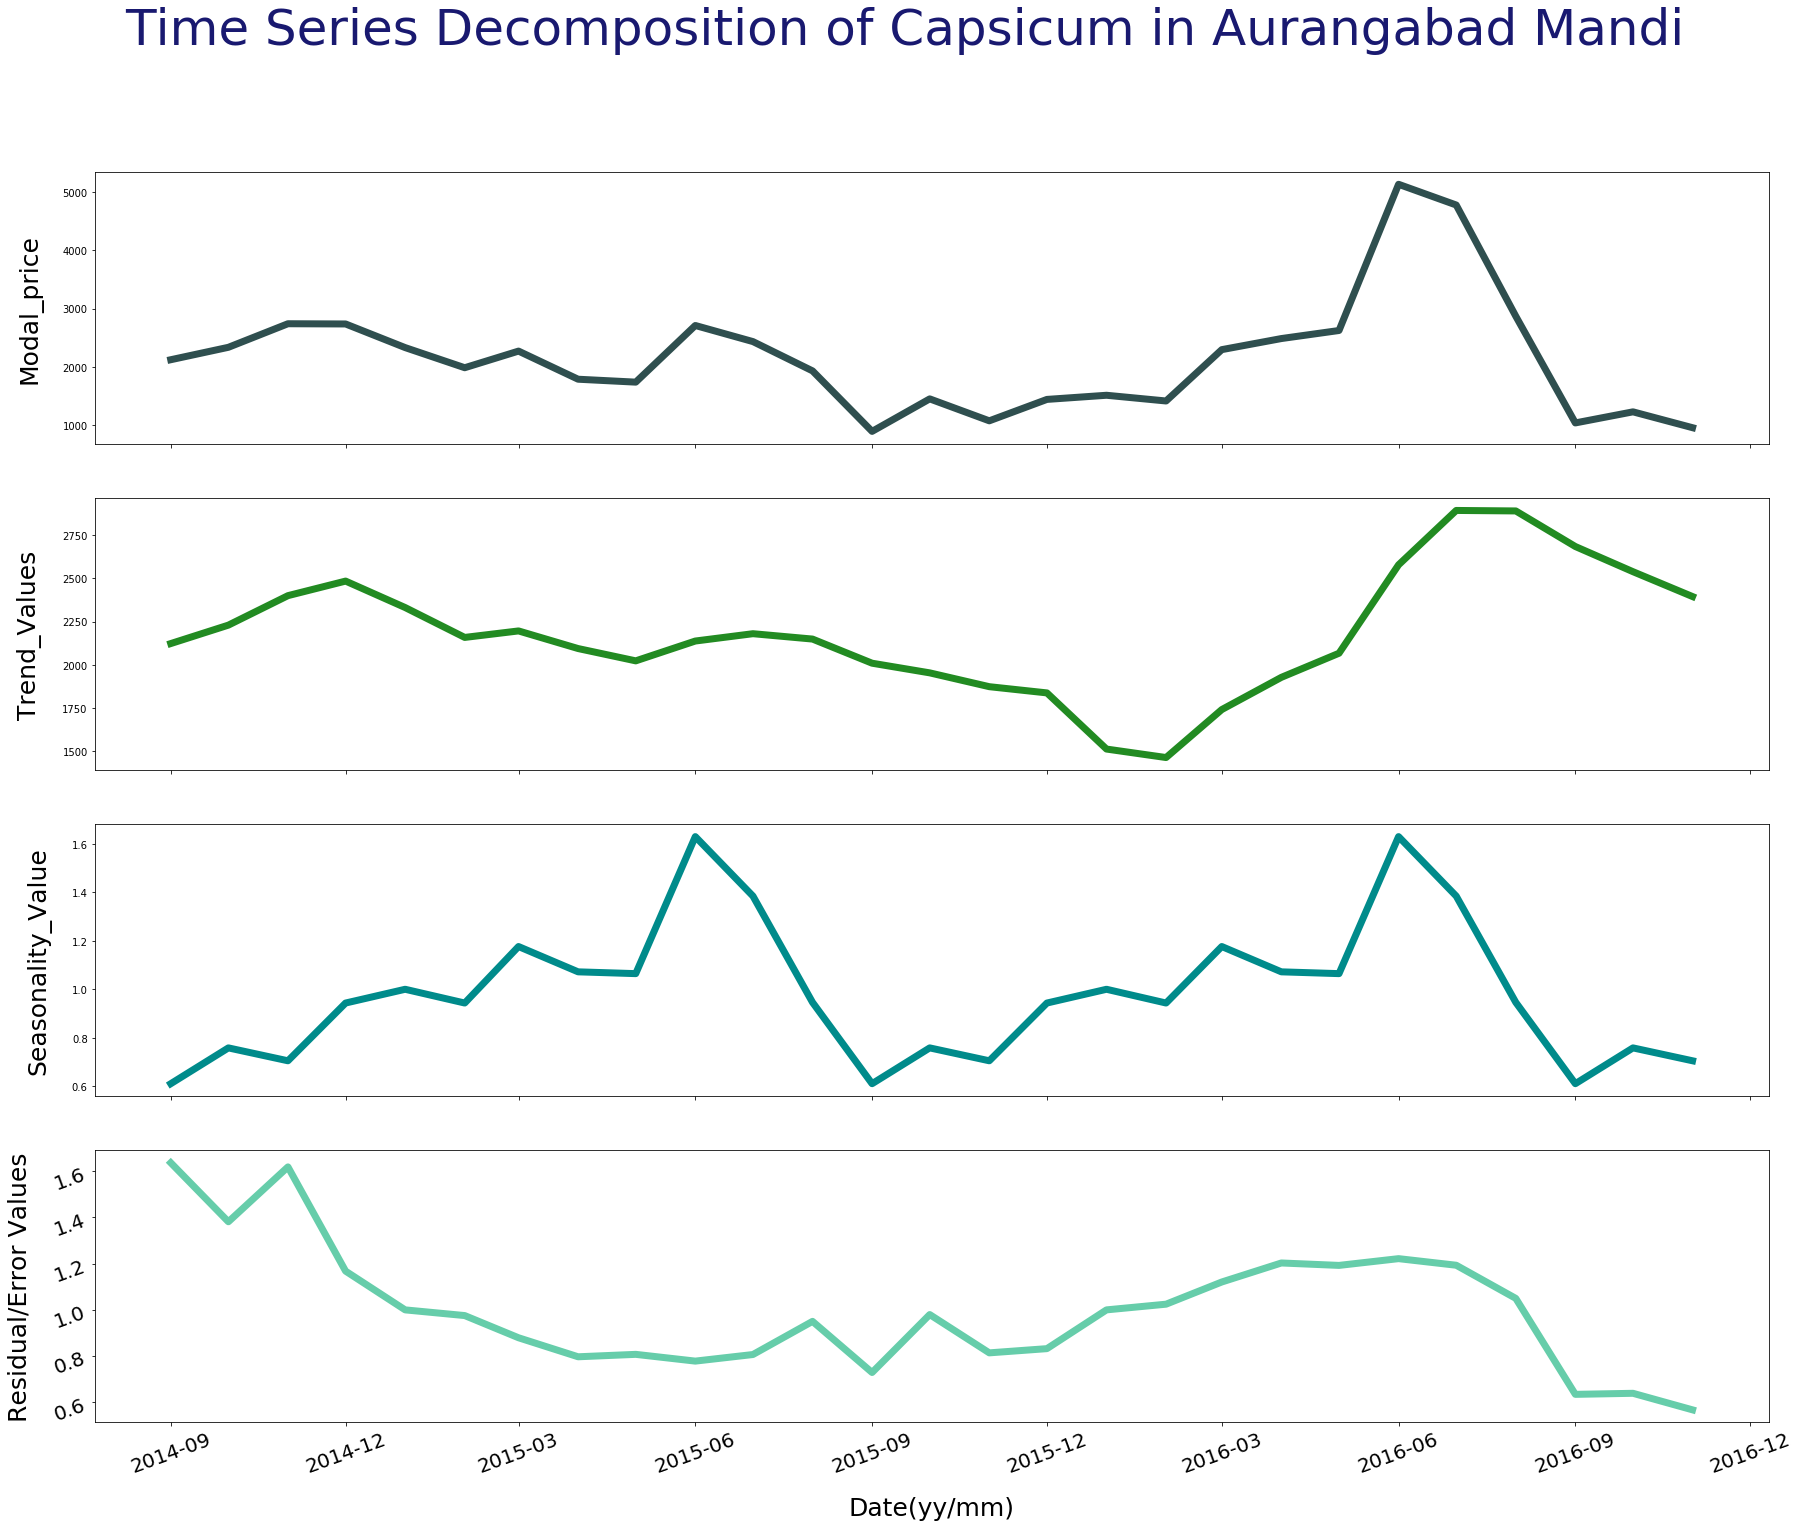

In [163]:
f, ax = plt.subplots(4, 1, figsize=(30,23),sharex=True)
plt.suptitle("Time Series Decomposition of Capsicum in Aurangabad Mandi",fontsize=50,color = "midnightblue")
plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 
plt.rcParams['xtick.major.size'] = '10'
plt.rcParams['ytick.major.size'] = '14'
plt.rcParams['xtick.major.pad']= '2'
plt.rcParams['ytick.major.pad']= '2'

ax[0].plot((total_data_new[(total_data_new['APMC'] == "Aurangabad") & (total_data_new["Commodity"] == "capsicum") ][['modal_price']]),linewidth = 7,color = "darkslategray")
#plt.xticks(fontsize=30, rotation=20)
#plt.yticks(fontsize=40, rotation=20)
ax[0].set_ylabel('Modal_price', fontsize = 25,labelpad = 20) # Y label

ax[1].plot((total_data_new[(total_data_new['APMC'] == "Aurangabad") & (total_data_new["Commodity"] == "capsicum") ][['trend']]),linewidth = 7,color = "forestgreen")
#plt.xticks(fontsize=20, rotation=20)
#plt.yticks(fontsize=20, rotation=20)
ax[1].set_ylabel('Trend_Values', fontsize = 25,labelpad = 20) # Y label

ax[2].plot((total_data_new[(total_data_new['APMC'] == "Aurangabad") & (total_data_new["Commodity"] == "capsicum") ][['seasonal_m']]),linewidth = 7,color = "darkcyan")
#plt.xticks(fontsize=20, rotation=20)
plt.yticks(fontsize=20, rotation=20)
ax[2].set_ylabel('Seasonality_Value', fontsize = 25,labelpad = 20) # Y label
#ax[2].set_xlabel('Dates', fontsize = 25)

ax[3].plot((total_data_new[(total_data_new['APMC'] == "Aurangabad") & (total_data_new["Commodity"] == "capsicum") ][['residual_m']]),linewidth = 7,color = "mediumaquamarine")
plt.xticks(fontsize=20, rotation=20)
#plt.yticks(fontsize=20, rotation=20)
ax[3].set_ylabel('Residual/Error Values', fontsize = 25,labelpad = 20) # Y label
ax[3].set_xlabel('Date(yy/mm)', fontsize = 25,labelpad = 20)

plt.savefig("graghs.png")

## Deseasonalised prices for each cluster of APMC,Commodity 

In [164]:
total_data_new['deseasonalised'] = total_data_new['modal_price']/total_data_new['seasonal_m']

In [165]:
total_data_new.head(100)

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,district_name,Year,Month,trend,detrended_m,seasonal_m,residual_m,Seasonilty_Type,deseasonalised
date,,,,,,,,,,,,,,,
2014-09-01,Devala,horsegram,3,3035,3035,3035,Nasik,2014,9,3035.0,1.0,1.089854,0.917554,Multiplicative,2784.776032
2014-09-01,Chandrapur,gram,54,2283,2638,2521,Chandrapur,2014,9,2521.0,1.0,1.000000,1.000000,Multiplicative,2521.000000
2014-09-01,Brahmpuri,paddy-unhusked,2378,2660,2755,2708,Chandrapur,2014,9,2708.0,1.0,1.064665,0.939262,Multiplicative,2543.522376
2014-09-01,Partur,gram,34,2053,2438,2328,Jalna,2014,9,2328.0,1.0,1.000000,1.000000,Multiplicative,2328.000000
2014-09-01,Partur,greengram,537,4657,6133,5370,Jalna,2014,9,5370.0,1.0,1.032676,0.968358,Multiplicative,5200.080170
2014-09-01,Partur,pigeonpea(tur),49,4360,4604,4516,Jalna,2014,9,4516.0,1.0,1.078611,0.927119,Multiplicative,4186.868081
2014-09-01,Aheri,paddy-unhusked,20,1400,1400,1400,Gadchiroli,2014,9,1400.0,1.0,0.949349,1.053353,Multiplicative,1474.694425
2014-09-01,Aheri,sorgum(jawar),10,1000,1000,1000,Gadchiroli,2014,9,1000.0,1.0,1.000000,1.000000,Multiplicative,1000.000000
2014-09-01,Aheri,rice(paddy-hus),20,1750,1750,1750,Gadchiroli,2014,9,1750.0,1.0,1.064388,0.939507,Multiplicative,1644.136847


In [166]:
#Saving file with seasonality and deseasonalised prices 
total_data_new.to_csv("total_data_seasonality_deasonalise.csv",encoding='utf-8', index=False)

## Comparing Prices MSP and RAW/Deseasonalized

In [167]:
#lower casing and removing the extra spaces from cmo_data
cmo_msp['commodity'] = cmo_msp['commodity'].str.lower()
cmo_msp['commodity']= cmo_msp['commodity'].str.replace(" ","")

In [168]:
cmo_msp['year'].unique()

array([2012, 2013, 2014, 2015, 2016], dtype=int64)

In [169]:
#Dropping the years not present in monthly_cmo_dataset

cmo_msp_new = cmo_msp[cmo_msp['year'] != 2012]
cmo_msp_new = cmo_msp_new[cmo_msp_new['year'] != 2013]

In [170]:
cmo_msp_new.head()

,commodity,year,Type,msprice,msp_filter
62,paddy-unhusked,2014,Kharif Crops,1360.0,1
63,rice(paddy-hus),2014,Kharif Crops,1400.0,1
64,jowar_hybrid,2014,Kharif Crops,1530.0,1
65,sorgum(jawar),2014,Kharif Crops,1550.0,1
66,bajri,2014,Kharif Crops,1250.0,1


In [171]:
cmo_msp_new.index = pd.RangeIndex(0,0 + len(cmo_msp_new))
print(cmo_msp_new.head())

         commodity  year          Type  msprice  msp_filter
0   paddy-unhusked  2014  Kharif Crops   1360.0           1
1  rice(paddy-hus)  2014  Kharif Crops   1400.0           1
2     jowar_hybrid  2014  Kharif Crops   1530.0           1
3    sorgum(jawar)  2014  Kharif Crops   1550.0           1
4            bajri  2014  Kharif Crops   1250.0           1


In [172]:
# Converting MSP prices to float 

cmo_msp_new['msprice'] = cmo_msp_new['msprice'].astype(float)

In [173]:
#Dividing data into years for further comparison 

df_new_2014 = total_data_new[total_data_new['Year']== 2014]
df_new_2015 = total_data_new[total_data_new['Year']== 2015]
df_new_2016 = total_data_new[total_data_new['Year']== 2016]

In [174]:
df_new_2014.reset_index(inplace=True)
df_new_2015.reset_index(inplace=True)
df_new_2016.reset_index(inplace=True)


In [175]:
cmo_msp_2014 = cmo_msp_new[cmo_msp_new['year'] == 2014]
cmo_msp_2015 = cmo_msp_new[cmo_msp_new['year'] == 2015]
cmo_msp_2016 = cmo_msp_new[cmo_msp_new['year'] == 2016]

In [176]:
cmo_msp_2014.index = pd.RangeIndex(0,0 + len(cmo_msp_2014))
print(cmo_msp_2014.head())

         commodity  year          Type  msprice  msp_filter
0   paddy-unhusked  2014  Kharif Crops   1360.0           1
1  rice(paddy-hus)  2014  Kharif Crops   1400.0           1
2     jowar_hybrid  2014  Kharif Crops   1530.0           1
3    sorgum(jawar)  2014  Kharif Crops   1550.0           1
4            bajri  2014  Kharif Crops   1250.0           1


In [177]:
cmo_msp_2015.index = pd.RangeIndex(0,0 + len(cmo_msp_2015))
print(cmo_msp_2015.head())

         commodity  year          Type  msprice  msp_filter
0   paddy-unhusked  2015  Kharif Crops   1410.0           1
1  rice(paddy-hus)  2015  Kharif Crops   1450.0           1
2     jowar_hybrid  2015  Kharif Crops   1570.0           1
3    sorgum(jawar)  2015  Kharif Crops   1590.0           1
4            bajri  2015  Kharif Crops   1275.0           1


In [178]:
cmo_msp_2016.index = pd.RangeIndex(0,0 + len(cmo_msp_2016))
print(cmo_msp_2016.head())

         commodity  year          Type  msprice  msp_filter
0   paddy-unhusked  2016  Kharif Crops   1470.0           1
1  rice(paddy-hus)  2016  Kharif Crops   1510.0           1
2     jowar_hybrid  2016  Kharif Crops   1625.0           1
3    sorgum(jawar)  2016  Kharif Crops   1650.0           1
4            bajri  2016  Kharif Crops   1330.0           1


### Joining yearwise data from monthly_cmo and cmo_msp 

In [179]:
df_2014 = pd.merge(cmo_msp_2014,df_new_2014, how = "left", left_on = "commodity" , right_on = "Commodity")
df_2015 = pd.merge(cmo_msp_2015,df_new_2015, how = "left", left_on = "commodity" , right_on = "Commodity")
df_2016 = pd.merge(cmo_msp_2016,df_new_2016, how = "left", left_on = "commodity" , right_on = "Commodity")

In [180]:
df_2014.dropna()
df_2015.dropna()
df_2016.dropna()

,commodity,year,Type,msprice,msp_filter,date,APMC,Commodity,arrivals_in_qtl,min_price,...,modal_price,district_name,Year,Month,trend,detrended_m,seasonal_m,residual_m,Seasonilty_Type,deseasonalised
0,paddy-unhusked,2016,Kharif Crops,1470.0,1,2016-01-01,Tumsar,paddy-unhusked,55572.0,1521.0,...,1584.0,Bhandara,2016.0,1.0,1584.000000,1.000000,1.000000,1.000000,Multiplicative,1584.000000
1,paddy-unhusked,2016,Kharif Crops,1470.0,1,2016-01-01,Murud,paddy-unhusked,720.0,1454.0,...,1510.0,Raigad,2016.0,1.0,1510.000000,1.000000,1.000000,1.000000,Multiplicative,1510.000000
2,paddy-unhusked,2016,Kharif Crops,1470.0,1,2016-01-01,Mangaon(Bhadav),paddy-unhusked,312.0,1410.0,...,1450.0,Raigad,2016.0,1.0,1450.000000,1.000000,1.000000,1.000000,Multiplicative,1450.000000
3,paddy-unhusked,2016,Kharif Crops,1470.0,1,2016-01-01,Mahad,paddy-unhusked,21.0,1421.0,...,1433.0,Raigad,2016.0,1.0,1433.000000,1.000000,1.000000,1.000000,Multiplicative,1433.000000
4,paddy-unhusked,2016,Kharif Crops,1470.0,1,2016-01-01,Karjat (Raigad),paddy-unhusked,1890.0,1310.0,...,1410.0,Raigad,2016.0,1.0,1410.000000,1.000000,1.000000,1.000000,Multiplicative,1410.000000
5,paddy-unhusked,2016,Kharif Crops,1470.0,1,2016-01-01,Alibag,paddy-unhusked,750.0,1454.0,...,1508.0,Raigad,2016.0,1.0,1508.000000,1.000000,1.000000,1.000000,Multiplicative,1508.000000
6,paddy-unhusked,2016,Kharif Crops,1470.0,1,2016-01-01,Roha,paddy-unhusked,10179.0,1410.0,...,1415.0,Raigad,2016.0,1.0,1415.000000,1.000000,1.000000,1.000000,Multiplicative,1415.000000
7,paddy-unhusked,2016,Kharif Crops,1470.0,1,2016-01-01,Pen,paddy-unhusked,216.0,1410.0,...,1410.0,Raigad,2016.0,1.0,1410.000000,1.000000,1.000000,1.000000,Multiplicative,1410.000000
8,paddy-unhusked,2016,Kharif Crops,1470.0,1,2016-01-01,Lakhandur,paddy-unhusked,10435.0,1622.0,...,1632.0,Bhandara,2016.0,1.0,1632.000000,1.000000,1.000000,1.000000,Multiplicative,1632.000000
9,paddy-unhusked,2016,Kharif Crops,1470.0,1,2016-01-01,Pavani,paddy-unhusked,2300.0,1756.0,...,1799.0,Bhandara,2016.0,1.0,1799.000000,1.000000,1.000000,1.000000,Multiplicative,1799.000000


### Comparing prices of msp to raw /deseasonalized prices for each year 

In [181]:
def price_compare(df): 
    df['raw_comparison'] = np.where(df['modal_price'] < df['msprice'],"Below_MSP","Above_MSP")
    df['deseasonalised_comaprison'] = np.where(df['deseasonalised'] < df['msprice'],"Below_MSP","Above_MSP")

In [182]:
price_compare(df_2014)


In [183]:
price_compare(df_2015)


In [184]:
price_compare(df_2016)

In [185]:
df_total = pd.concat([df_2014,df_2015,df_2016])

In [63]:
df_total.to_csv("MSP_status.csv",encoding='utf-8', index=False)

#### Counting the no. of Commodities above/below MSP for raw/deseasonalised prices 

In [186]:
len(df_total[df_total['raw_comparison'] == "Below_MSP"])

5645

In [187]:
len(df_total[df_total['raw_comparison'] == "Above_MSP"])

14142

In [188]:
len(df_total[df_total['deseasonalised_comaprison'] == "Below_MSP"])

5978

In [189]:
len(df_total[df_total['deseasonalised_comaprison'] == "Above_MSP"])

13809

## Data Fluctuations

In [ ]:
#Finding data fluctuation as difference between Maximum and Minimum prices 

In [190]:
total_data_new['data_fluctuation'] = total_data_new['max_price'] - total_data_new['min_price']
print (total_data_new.head())

                  APMC       Commodity  arrivals_in_qtl  min_price  max_price  \
date                                                                            
2014-09-01      Devala       horsegram                3       3035       3035   
2014-09-01  Chandrapur            gram               54       2283       2638   
2014-09-01   Brahmpuri  paddy-unhusked             2378       2660       2755   
2014-09-01      Partur            gram               34       2053       2438   
2014-09-01      Partur       greengram              537       4657       6133   

            modal_price district_name  Year  Month   trend  detrended_m  \
date                                                                      
2014-09-01         3035         Nasik  2014      9  3035.0          1.0   
2014-09-01         2521    Chandrapur  2014      9  2521.0          1.0   
2014-09-01         2708    Chandrapur  2014      9  2708.0          1.0   
2014-09-01         2328         Jalna  2014      9  2328.

In [191]:
total_data_new = total_data_new.reset_index()

In [192]:
data_2014_fluc = total_data_new[total_data_new['Year']== 2014]
data_2015_fluc = total_data_new[total_data_new['Year']== 2015]
data_2016_fluc = total_data_new[total_data_new['Year']== 2016]

In [193]:
data_2014_fluc

,date,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,district_name,Year,Month,trend,detrended_m,seasonal_m,residual_m,Seasonilty_Type,deseasonalised,data_fluctuation
0,2014-09-01,Devala,horsegram,3,3035,3035,3035,Nasik,2014,9,3035.000000,1.000000,1.089854,0.917554,Multiplicative,2784.776032,0
1,2014-09-01,Chandrapur,gram,54,2283,2638,2521,Chandrapur,2014,9,2521.000000,1.000000,1.000000,1.000000,Multiplicative,2521.000000,355
2,2014-09-01,Brahmpuri,paddy-unhusked,2378,2660,2755,2708,Chandrapur,2014,9,2708.000000,1.000000,1.064665,0.939262,Multiplicative,2543.522376,95
3,2014-09-01,Partur,gram,34,2053,2438,2328,Jalna,2014,9,2328.000000,1.000000,1.000000,1.000000,Multiplicative,2328.000000,385
4,2014-09-01,Partur,greengram,537,4657,6133,5370,Jalna,2014,9,5370.000000,1.000000,1.032676,0.968358,Multiplicative,5200.080170,1476
5,2014-09-01,Partur,pigeonpea(tur),49,4360,4604,4516,Jalna,2014,9,4516.000000,1.000000,1.078611,0.927119,Multiplicative,4186.868081,244
6,2014-09-01,Aheri,paddy-unhusked,20,1400,1400,1400,Gadchiroli,2014,9,1400.000000,1.000000,0.949349,1.053353,Multiplicative,1474.694425,0
7,2014-09-01,Aheri,sorgum(jawar),10,1000,1000,1000,Gadchiroli,2014,9,1000.000000,1.000000,1.000000,1.000000,Multiplicative,1000.000000,0
8,2014-09-01,Aheri,rice(paddy-hus),20,1750,1750,1750,Gadchiroli,2014,9,1750.000000,1.000000,1.064388,0.939507,Multiplicative,1644.136847,0
9,2014-09-01,Aheri,batbati,6,3500,3500,3500,Gadchiroli,2014,9,3500.000000,1.000000,0.913484,1.094711,Multiplicative,3831.486830,0


In [194]:
def maximum_fluctuations(df):
    df_fluc_max = df.loc[df.groupby(df['date'])['data_fluctuation'].idxmax()]
    return (df_fluc_max)

In [195]:
data_fluc_2014_max = (maximum_fluctuations(data_2014_fluc))
print (data_fluc_2014_max)

           date             APMC    Commodity  arrivals_in_qtl  min_price  \
1636 2014-09-01           Rahata  pomegranate            43143       1435   
3094 2014-10-01      Pune-Manjri   green-peas                1          0   
3856 2014-11-01  Indapur-Bhigwan   ghevdaseed                3       4525   
7187 2014-12-01           Umared       lentil                1       2525   

      max_price  modal_price district_name  Year  Month        trend  \
1636       9285         5978    Ahmadnagar  2014      9  5978.000000   
3094      10000            0          Pune  2014     10   857.000000   
3856      24756         4731          Pune  2014     11  4731.000000   
7187      25250         2525        Nagpur  2014     12  3273.666667   

      detrended_m  seasonal_m  residual_m Seasonilty_Type  deseasonalised  \
1636     1.000000    1.069888    0.934677  Multiplicative     5587.498848   
3094     0.000000    0.693267    0.000000  Multiplicative        0.000000   
3856     1.000000    1

In [196]:
data_fluc_2015_max = (maximum_fluctuations(data_2015_fluc))
print (data_fluc_2015_max)

            date      APMC     Commodity  arrivals_in_qtl  min_price  \
8375  2015-01-01   Indapur   pomegranate             8083       1808   
10606 2015-02-01   Indapur   pomegranate             8336       2233   
13014 2015-03-01    Rahata   pomegranate             6562       1500   
14267 2015-04-01   Solapur   pomegranate            12344       1109   
16739 2015-05-01   Solapur   pomegranate            11017        935   
17898 2015-06-01    Rahata   pomegranate            30049       1409   
20908 2015-07-01      Pune  custardapple              240       2167   
21720 2015-08-01  Kurdwadi          gram               15       3467   
23430 2015-09-01    Rahata   pomegranate            59099       1000   
26225 2015-10-01    Rahata   pomegranate            34489       1050   
27902 2015-11-01    Rahata   pomegranate            32526       1000   
30402 2015-12-01  Kolhapur  bullockheart               10       2000   

       max_price  modal_price district_name  Year  Month       

In [197]:
data_fluc_2016_max = (maximum_fluctuations(data_2016_fluc))
print (data_fluc_2015_max)

            date      APMC     Commodity  arrivals_in_qtl  min_price  \
8375  2015-01-01   Indapur   pomegranate             8083       1808   
10606 2015-02-01   Indapur   pomegranate             8336       2233   
13014 2015-03-01    Rahata   pomegranate             6562       1500   
14267 2015-04-01   Solapur   pomegranate            12344       1109   
16739 2015-05-01   Solapur   pomegranate            11017        935   
17898 2015-06-01    Rahata   pomegranate            30049       1409   
20908 2015-07-01      Pune  custardapple              240       2167   
21720 2015-08-01  Kurdwadi          gram               15       3467   
23430 2015-09-01    Rahata   pomegranate            59099       1000   
26225 2015-10-01    Rahata   pomegranate            34489       1050   
27902 2015-11-01    Rahata   pomegranate            32526       1000   
30402 2015-12-01  Kolhapur  bullockheart               10       2000   

       max_price  modal_price district_name  Year  Month       

In [198]:
total_fluc_max = pd.concat([data_fluc_2014_max,data_fluc_2015_max,data_fluc_2016_max])
print (total_fluc_max)

            date                APMC       Commodity  arrivals_in_qtl  \
1636  2014-09-01              Rahata     pomegranate            43143   
3094  2014-10-01         Pune-Manjri      green-peas                1   
3856  2014-11-01     Indapur-Bhigwan      ghevdaseed                3   
7187  2014-12-01              Umared          lentil                1   
8375  2015-01-01             Indapur     pomegranate             8083   
10606 2015-02-01             Indapur     pomegranate             8336   
13014 2015-03-01              Rahata     pomegranate             6562   
14267 2015-04-01             Solapur     pomegranate            12344   
16739 2015-05-01             Solapur     pomegranate            11017   
17898 2015-06-01              Rahata     pomegranate            30049   
20908 2015-07-01                Pune    custardapple              240   
21720 2015-08-01            Kurdwadi            gram               15   
23430 2015-09-01              Rahata     pomegranat

In [77]:
total_fluc_max.to_csv("APMC_Commodities_Max_Price_Fluc_Year _Month.csv",encoding='utf-8', index=False)